Fetch Content Translation statistics
===

In [1]:
from wiki_article_count import get_language_sizes

language_sizes = get_language_sizes()

In [ ]:
from content_translation_statistics import get_translated_out

translated_out = get_translated_out()

Plot
===

Set up the default plot to render inline, at 12 x 12 inches.

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 12]

Graph total articles translated from a language against its size.

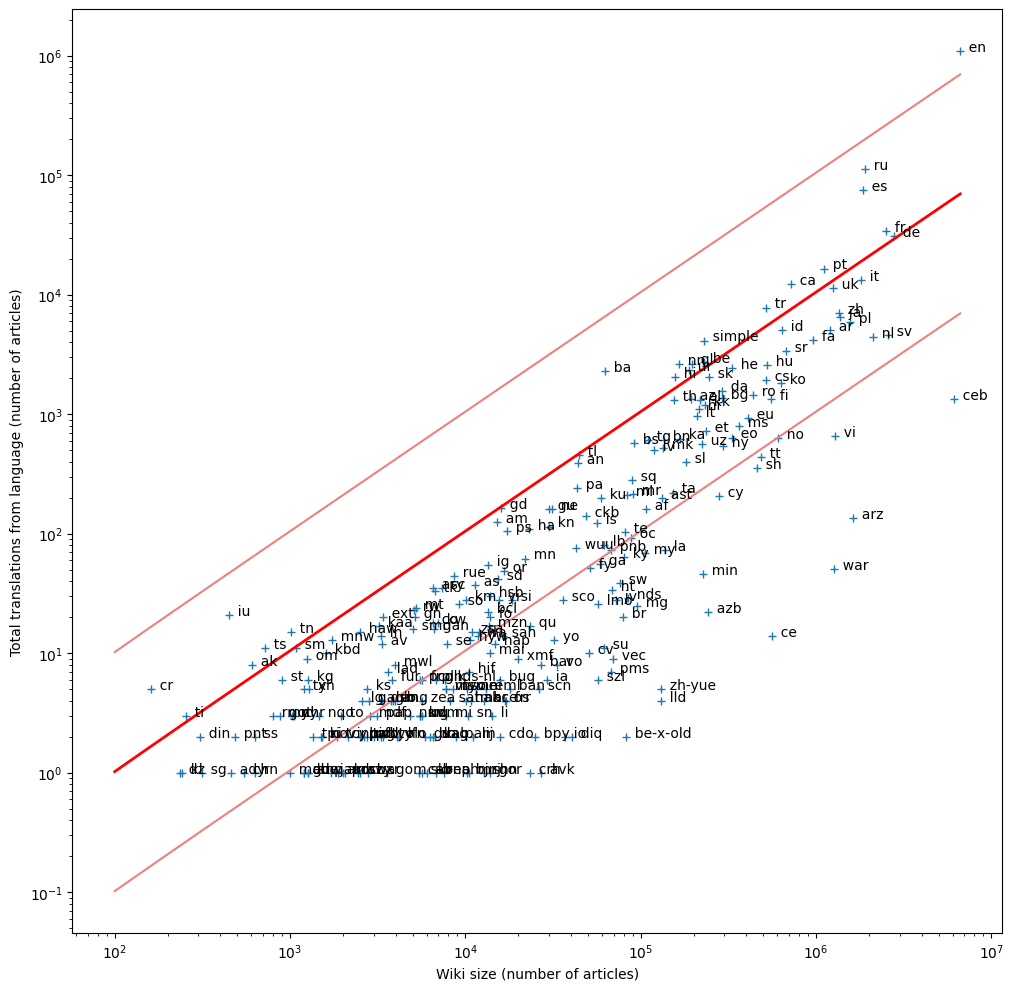

In [6]:
import numpy as np

# Filter to languages in both sets
langs = [l for l in translated_out.keys() if l in language_sizes and language_sizes[l] > 0]

x = [language_sizes[l] for l in langs]
y = [translated_out[l] for l in langs]

fig, ax = plt.subplots()

ax.loglog(x, y, "+")

for l in langs:
    ax.annotate("  " + l, (language_sizes[l], translated_out[l]))

# linear regression of loglog
fit = np.polyfit(np.log10(x), np.log10(y), deg=1)
fitf = np.poly1d(fit)
xf = np.logspace(2, np.log10(language_sizes["en"]))
# xf = np.linspace(100, 6900000)
# xf = np.linspace(2, 6.9)
# FIXME: Why is the regression scaled too high?
yf = fitf(xf) / 100

plt.plot(xf, yf, color='r', lw=2, label="Linear regression")
plt.plot(xf, yf * 10, color='lightcoral')
plt.plot(xf, yf / 10, color='lightcoral')

plt.xlabel('Wiki size (number of articles)')
plt.ylabel('Total translations from language (number of articles)')
plt.show()